# Fake Job Posting Detection
***

## Table of the content 
- [Data Description](#a)
- [Goal and objectives](#b)
- [Data pre-processing](#c)
  - [Missing Values](#c1)
- [Data Exploration & Visualisation ](#d)
- [Predictive Modelling](#e)
  - [Overview of the methodology](#e1)
  - [Feature Selection](#e2)
  - [Pre-processing](#e3)
  - [Classification Algorithm](#e4)
    - [Logistic Regression](#e41)
    - [Random Forest](#e42)
    - [KNN](#e43)
    - [Decision Tree](#e44)
  - [Performance comparison](#e5)
- [Limitation and solution](#f)
- [Summary & Conclusions](#g)

# Data Description <a name="a"></a>

The Employment Scam Aegean Dataset (EMSCAD) or also known well as *Fake Job Posting* dataset is used in this project to predict the fraudulent of the job advertisments that published between the year 2012 to 2014. EMSCAD dataset is accessible to public and it consist of 17,880 job descriptions that intended to enlighten the Employment Scam issues to research community. This dataset contains 18 columns and 17,880 rows. To be more specific, the dataset has 17,014 legitimate and 866 fake job posts. The dataset is downloaded from <a href="http://emscad.samos.aegean.gr/">Employment Scam Aegean Dataset</a>. The target feature in this project is *fraudulent* column since the fraudulent of job advertisements going to be predicted. Since the target feature is a categorical variable, classification under supervised machine learning will be used to perform the prediction. 

In [1]:
import pandas as pd 
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')

#importing/reading the data 
df = pd.read_csv('S3794334_Data.csv', sep = ',')

# View the dataset
df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f


The shape of the dataset is checked to make sure the data has been downloaded correctly.Also, the features type is checked in order to have a better understanding about the structure and format of the dataset.  

In [2]:
#checking the shape of the dataset
df.shape

(17880, 18)

In [3]:
#checking the type of the attributes
df.dtypes

title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting          object
has_company_logo       object
has_questions          object
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent             object
in_balanced_dataset    object
dtype: object

# Goal and objectives <a name="b"></a>

## Goal
The goal of this project is to predict the fraudulent of the job advertisments by performing a comparative analysis on four different classification models.  
## Objectives
- To perform data analysis to acquire fascinating insights from the dataset
- To build a classification model which will able to detect fraud job posts effectively with high accurancy. 
- To find out features with words and phrases in the the job advertisement which are deceitful in nature
- To identify relevent features with the help of feature selection techniques in order to minimize dimensionality 

# Data Preprocessing <a name="c"></a>

Unnecessary columns such as *telecommuting* and many more will be dropped from the table

In [4]:
# drop  telecommuting,in_balanced_dataset
df=df.drop(['telecommuting','in_balanced_dataset'], axis=1)

Column *has_company_logo*, *has_questions* and *fraudulent* have binary values, t (true) and f (false). These columns will be converted to numeric. For *fraudulent* column, if the job is fake 1 will be assigned and if it is a real job 0 will be assigned. For the other two columns, true is assigned to 0 and false is assigned to 1. 

In [5]:
# Encode columns f as 0 and t as 1
df['has_company_logo'] = df['has_company_logo'].map({'t': 0, 'f':1})
df['fraudulent'] = df['fraudulent'].map({'t': 1, 'f':0})
df['has_questions'] = df['has_questions'].map({'t': 0, 'f':1})

## Missing Values <a name="c1"></a>

Calculating number of the missing values in each columns

In [6]:
df.isnull().sum()

title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                0
requirements            2689
benefits                7196
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

The other features that contain the missing values are categorical features. Replacing these features with their mode will change the nature of the dataset. Hence, the missing values in these categorical features will be replaced with *none*. 

In [7]:
# missing values in Location will be assigned none
df['location'] = df['location'].fillna('none')

# missing values in Department will be assigned none
df['department'] = df['department'].fillna('none')

# missing values in Company profile will be assigned none
df['company_profile'] = df['company_profile'].fillna('none')

# missing values in Description will be assigned none
df['description'] = df['description'].fillna('none')

# missing values in Requirements will be assigned none
df['requirements'] = df['requirements'].fillna('none')

# missing values in Benefits will be assigned none
df['benefits'] = df['benefits'].fillna('none')

# missing values in Employment type will be assigned none
df['employment_type'] = df['employment_type'].fillna('none')

# missing values in Required experience will be assigned none
df['required_experience'] = df['required_experience'].fillna('none')

# missing values in Required education will be assigned none
df['required_education'] = df['required_education'].fillna('none') 

# missing values in Industry will be assigned none
df['industry'] = df['industry'].fillna('none')

# missing values in Function will be assigned none
df['function'] = df['function'].fillna('none') 

# missing values in Industry will be assigned none
df['salary_range'] = df['salary_range'].fillna('none')

# missing values in Function will be assigned none
df['has_questions'] = df['has_questions'].fillna('none') 

# replacing empty space in Employment type to none
df['employment_type'] = df['employment_type'].mask(lambda x : x =='', other = 'none') 

In [8]:
#checking the dataset after replacing the null values
df.isnull().sum()

title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

*company_profile*, *description* and *requirements* are the columns that contain html tags which need to be removed.

In [9]:
#removing the HTML tags
df['company_profile'] = df['company_profile'].str.replace(r'<[^>]*>', '')
df['description'] = df['description'].str.replace(r'<[^>]*>', '')
df['requirements'] = df['requirements'].str.replace(r'<[^>]*>', '')
df['benefits'] = df['benefits'].str.replace(r'<[^>]*>', '')

This dataset has many non-alphanumeric characters and white spaces which will be removed. 

In [10]:
# Removing non word characters and trailing white space 
for col in df.columns:
    df[col] = df[col].apply(str).str.replace(r'\W', ' ').apply(str).str.replace(r'\s$','')

Stemming is used to reduce the related words and removal of the stop words is also carried out to diminish the commonly used English words. Then, the text in the dataset has been changed to lowercase. 

In [11]:
#to download the package
#import nltk
#nltk.download();
#nltk.download('stopwords');
#--------------(or)
#import nltk
#nltk.download()

In [12]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')
stop_word = stopwords.words('english')

text= ['title', 'location', 'department', 'company_profile', 'description', 'requirements','benefits','employment_type',
                'required_experience','required_education','industry','function']

def clean_series(col):
    df[col] = df[col].apply(lambda x: " ".join([i for i in x.lower().split() if i not in stop_word]))

for col in text:
    clean_series(col)

In [13]:
# View the dataset after the data preprocessing
df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,marketing intern,us ny new york,marketing,none,food52 created groundbreaking award winning co...,food52 fast growing james beard award winning ...,experience content management systems major pl...,none,0,1,,internship,none,none,marketing,0
1,customer service cloud video production,nz auckland,success,none,90 seconds worlds cloud video production servi...,organised focused vibrant awesome passion cust...,expect key responsibility communicate client 9...,get us part 90 seconds team gain experience wo...,0,1,full time,applicable,none,marketing advertising,customer service,0
2,commissioning machinery assistant cma,us ia wever,none,none,valor services provides workforce solutions me...,client located houston actively seeking experi...,implement pre commissioning commissioning proc...,none,0,1,none,none,none,none,none,0
3,account executive washington dc,us dc washington,sales,none,passion improving quality life geography heart...,company esri environmental systems research in...,education bachelor master gis business adminis...,culture anything corporate collaborative creat...,0,1,full time,mid senior level,bachelor degree,computer software,sales,0
4,bill review manager,us fl fort worth,none,none,spotsource solutions llc global human capital ...,job title itemization review manager location ...,qualifications rn license state texas diploma ...,full benefits offered,0,0,full time,mid senior level,bachelor degree,hospital health care,health care provider,0


# Data Exploration & Visualisation <a name="d"></a>

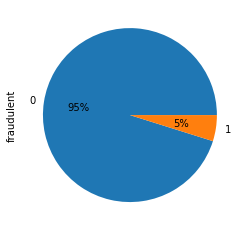

In [14]:
df['fraudulent'].value_counts().plot.pie(autopct='%1.0f%%')

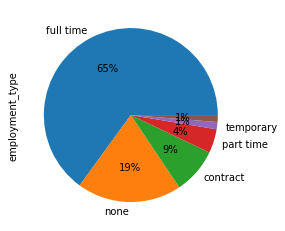

In [15]:
df['employment_type'].value_counts().plot.pie(autopct='%1.0f%%')

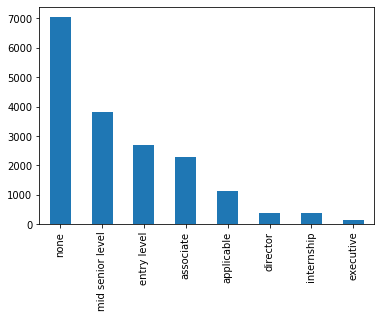

In [16]:
df['required_experience'].value_counts().plot.bar()

95% of the job posts are legitimate and the rest 5% are fake. Most of the job post required full-time employees. However, the required experience is missing in the most of the job posts. 

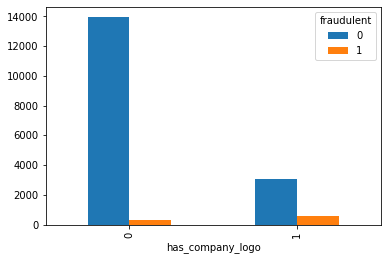

In [17]:
grouped = df.groupby(['has_company_logo','fraudulent'])

size = grouped.size()

size.unstack().plot.bar()

Most of the job posts have the company logo.In that, majority of the legitimate job posts have the company logo.Moreover, most of the fake job posts do not have the company logos. 

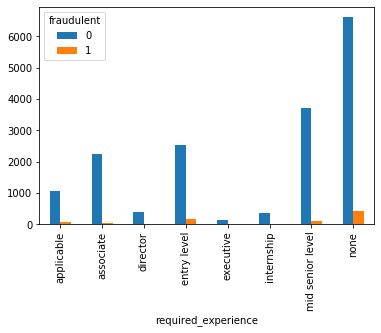

In [18]:
grouped = df.groupby(['required_experience','fraudulent'])

size = grouped.size()

size.unstack().plot.bar()

Majority of the job posts do not mentioned the required experience and the fakeness level in this type of job posts are higher compare to the job posts with required experience. 

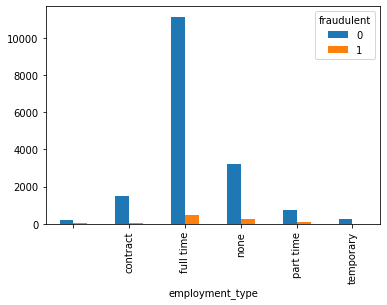

In [19]:
grouped = df.groupby(['employment_type','fraudulent'])

size = grouped.size()

size.unstack().plot.bar()

Most of the job posts required full time employees and most of them are legitimate job posts. 

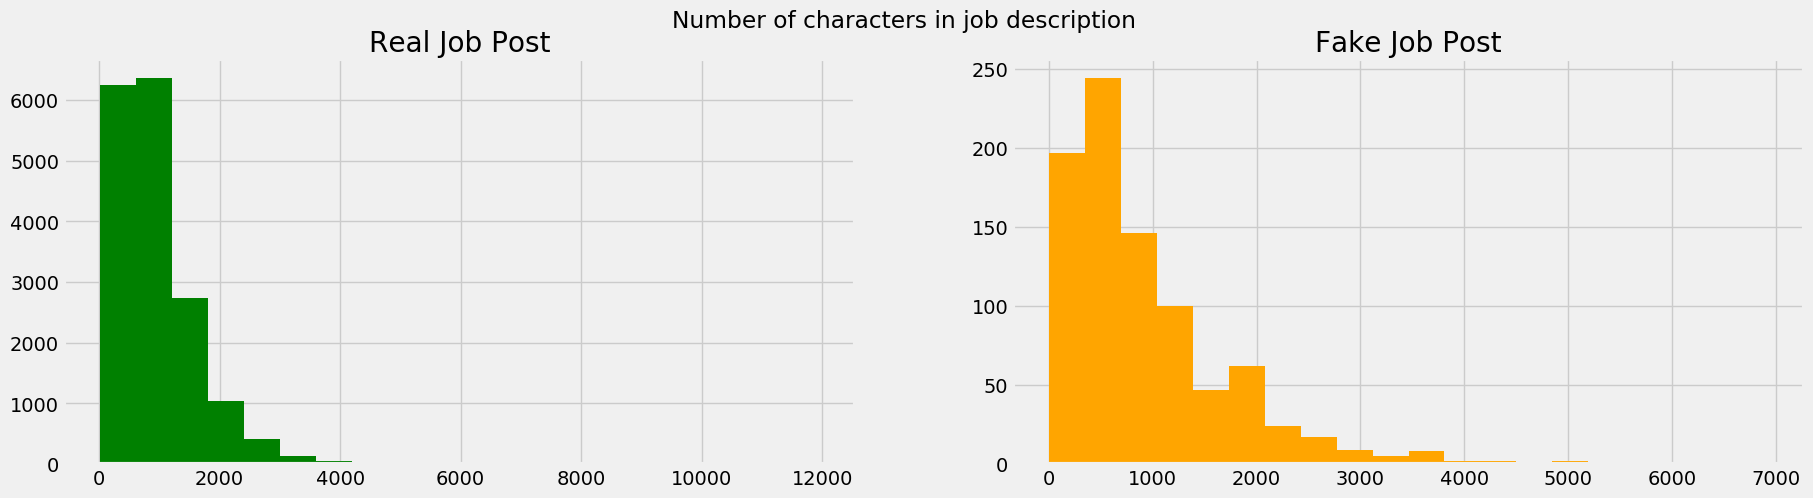

In [20]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#Extracting Text Featurs
text = df[['title', 'company_profile', 'description', 'requirements','benefits','fraudulent']]

fig,(ax,ax1)= plt.subplots(ncols=2, figsize=(20, 5), dpi=100)
length=text[text['fraudulent']=='0']['description'].str.len()
ax.hist(length, bins = 20,color='green')
ax.set_title('Real Job Post')

length=text[text['fraudulent']=='1']['description'].str.len()
ax1.hist(length,bins = 20,color='orange')
ax1.set_title('Fake Job Post')

fig.suptitle('Number of characters in job description')
plt.show()

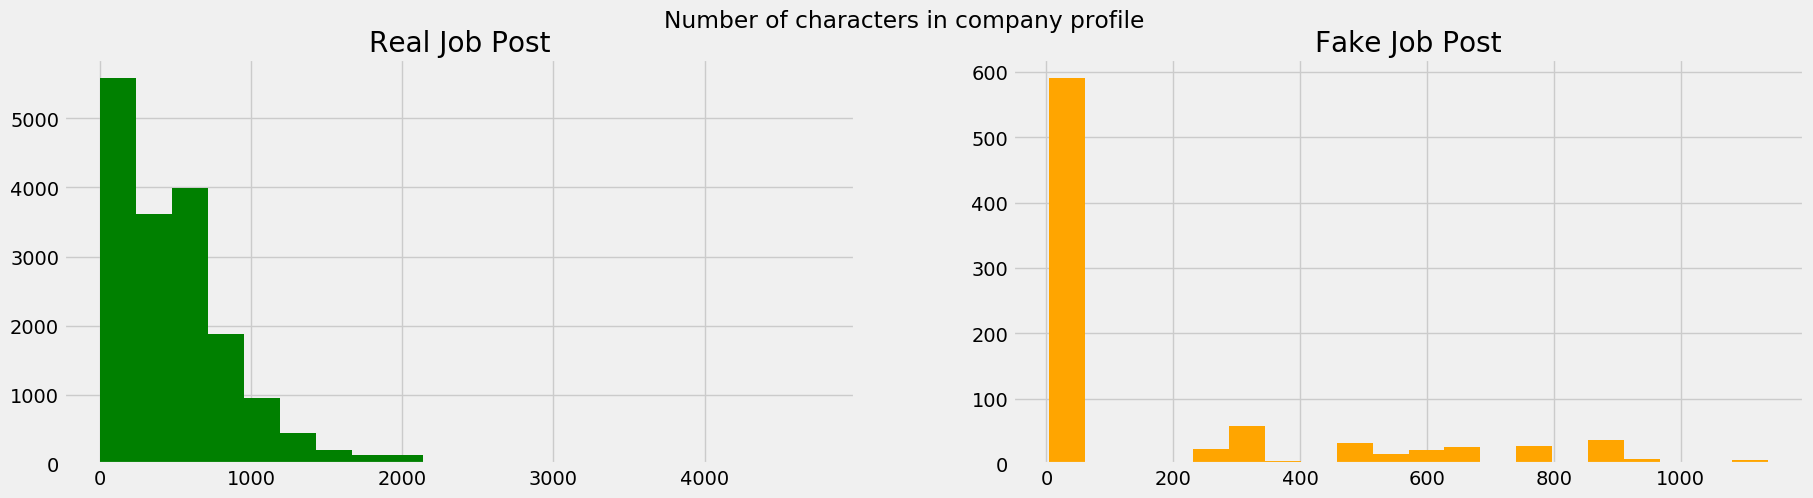

In [21]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

fig,(ax,ax1)= plt.subplots(ncols=2, figsize=(20, 5), dpi=100)
length=text[text['fraudulent']=='0']['company_profile'].str.len()
ax.hist(length, bins = 20,color='green')
ax.set_title('Real Job Post')

length=text[text['fraudulent']=='1']['company_profile'].str.len()
ax1.hist(length,bins = 20,color='orange')
ax1.set_title('Fake Job Post')

fig.suptitle('Number of characters in company profile')
plt.show()

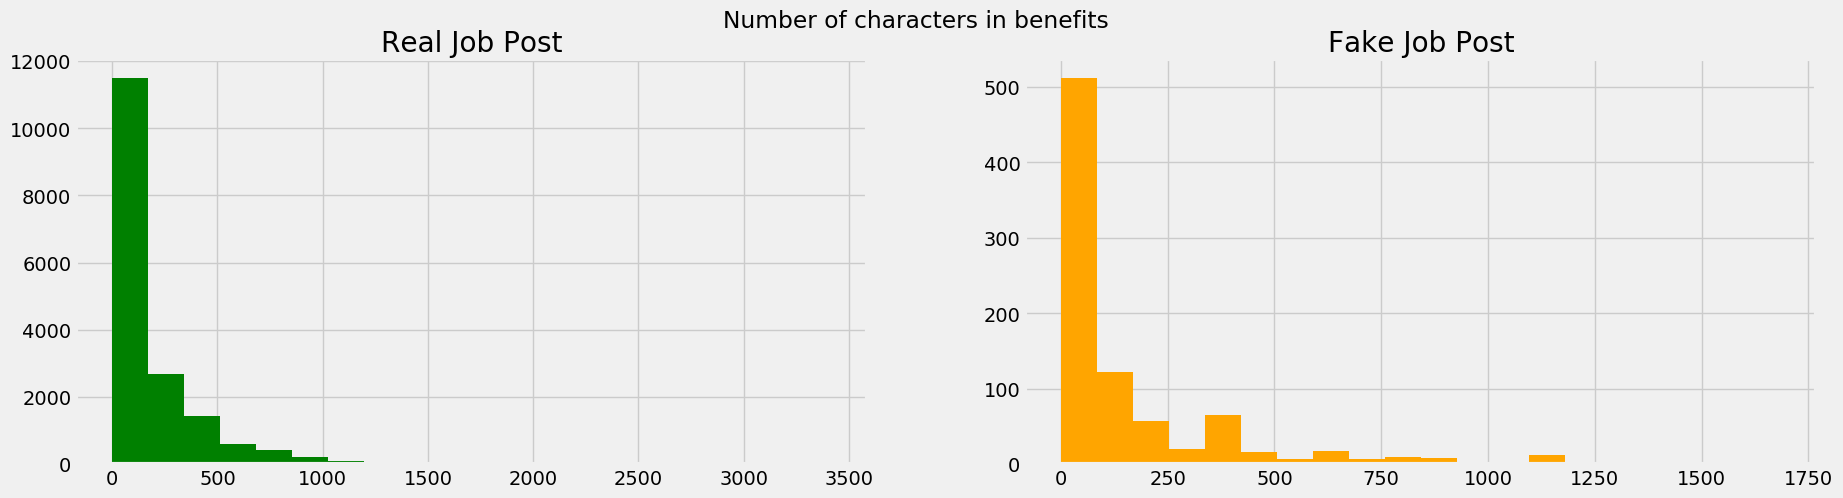

In [22]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

fig,(ax,ax1)= plt.subplots(ncols=2, figsize=(20, 5), dpi=100)
length=text[text['fraudulent']=='0']['benefits'].str.len()
ax.hist(length, bins = 20,color='green')
ax.set_title('Real Job Post')

length=text[text['fraudulent']=='1']['benefits'].str.len()
ax1.hist(length,bins = 20,color='orange')
ax1.set_title('Fake Job Post')

fig.suptitle('Number of characters in benefits')
plt.show()

Fake job posts have more characters in job descriptions and benefits compare to the legitimate job posts. However, legitimate job posts have more number of characters in company profile compare to the fake job post. It is clearly shows that, legitimate job posts have detail information about the company profile and fake job posts have more descriptions and job benefits to attract the candidates. 

In [23]:
logo=df[df['has_company_logo']=='0']
logo['has_company_logo'].value_counts()

0    14220
Name: has_company_logo, dtype: int64

In [24]:
ques=logo[logo['has_questions']=='0']
ques['has_questions'].value_counts()

0    7836
Name: has_questions, dtype: int64

In [25]:
ques['fraudulent'].value_counts()

0    7679
1     157
Name: fraudulent, dtype: int64

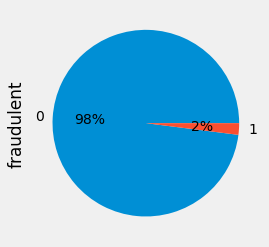

In [26]:
ques['fraudulent'].value_counts().plot.pie(autopct='%1.0f%%')

This pie chart above clearly shows that, the companies which have company logos and questions in the job advertisements are 98% legitimate. 

In [27]:
logo=df[df['has_company_logo']=='1']
logo['has_company_logo'].value_counts()

1    3660
Name: has_company_logo, dtype: int64

In [28]:
ques=logo[logo['has_questions']=='1']
ques['has_questions'].value_counts()

1    2704
Name: has_questions, dtype: int64

In [29]:
ques['fraudulent'].value_counts()

0    2214
1     490
Name: fraudulent, dtype: int64

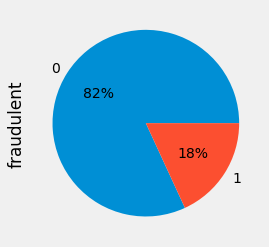

In [30]:
ques['fraudulent'].value_counts().plot.pie(autopct='%1.0f%%')

This pie chart above shows that, the companies which do not have company logo and questions in the job advertisements are 82% legitimate. This is due to the imbalance count in the fake and real job post as majority of the job posts are legitimate. However, while comparing to the previous pie chart, the percentage of the fake job posts is much higher. 

In [31]:
fd=df[df['fraudulent']=='1']
fd['fraudulent'].value_counts()

1    866
Name: fraudulent, dtype: int64

In [32]:
ques=fd[fd['has_questions']=='1']
ques['has_questions'].value_counts()

1    616
Name: has_questions, dtype: int64

In [33]:
ques['has_company_logo'].value_counts()

1    490
0    126
Name: has_company_logo, dtype: int64

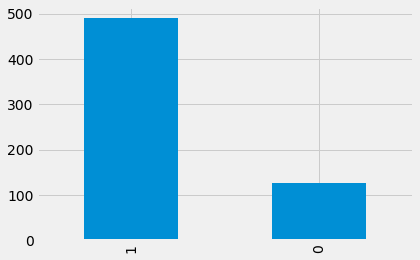

In [34]:
ques['has_company_logo'].value_counts().plot.bar()

The diagram above shows that, the majority of the fake job posts without question do not have company logos. 

Numeric summary will be generated to have a better understanding about the preprocessed data before modelling it. 

In [35]:
#numerical summary of the dataframe
df.describe()

,title,location,department,salary_range,company_profile,description,requirements,benefits,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
count,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880
unique,10466,2727,1186,875,1707,14407,11734,5753,2,2,6,8,14,132,38,2
top,english teacher abroad,gb lnd london,none,none,none,play kids get paid love travel jobs asia 1 500...,none,none,0,1,full time,none,none,none,none,0
freq,406,750,11547,15012,3308,417,2690,7199,14220,9088,11620,7050,8105,4903,6455,17014


# Predictive Modelling <a name="e"></a>

## Overview of the methodology <a name="e1"></a>

This project presents a comparative analysis of  Employment Scam problem using four different machine learning algorithms. The comparative analysis will be performed to predict the fraudulent of the job advertisments. In this project, 4 different machine learning algorithms will be used to build the models. Performance and the accurancy level of the models will be evaluated using hyperparameters tuning and cross-validation method. The best model with high accurancy will be selected as the proposed model for this project. KNN, Random Forest,Decision tree and Logistic Regression are the algorithms that will be used in building the models.<br>
The proposed models will be involved five main stages of scrutiny:
 - First stage: Feature selection, where the important feature is selected to build the models
 - Second stage: Pre-processing stage where the selected features will go through the data pre-processing as the features are text(words and phrases)
 - Third stage:Classification, where the 4 different algorithms used to build the models separately
 - Fourth stage:Model selection, where a grid search or hyperparameters tuning is used for the models to find the optimal parameters  
 - Fifth stage:  Performance comparison, where each model will be compared to the other models using paired t-tests

## Feature Selection <a name="e2"></a>

Since, the important features in this data are categorical features which are going to be combined as one during the pre-processing stage, the feature selection will be performed first. Top 5 features have been selected as these columns have more number of words.

In [36]:
#feature selection
text_df = df[["title", "company_profile", "description", "requirements", "benefits","fraudulent"]]

In [37]:
text = text_df[text_df.columns[0:5]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)
target = df['fraudulent']


##  Pre-processing  <a name="e3"></a>

Data preprocessing is performed for the selected text features using tokenization. Tokenization enables the text to be divided into meaningful pieces. 

In [38]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

# applying tokenizer
text = text.apply(lambda x: tokenizer.tokenize(x))
text.head(3)

0    [marketing, intern, food52, created, groundbre...
1    [customer, service, cloud, video, production, ...
2    [commissioning, machinery, assistant, cma, val...
dtype: object

In [39]:
#Removing the punctuation
def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

text = text.apply(lambda x : combine_text(x))
text.head(3)

0    marketing intern food52 created groundbreaking...
1    customer service cloud video production 90 sec...
2    commissioning machinery assistant cma valor se...
dtype: object

The dataset will be splitted into train and test set with the standard ratio of 70%-30% (70% for the training set and 30% for the testing set). 

In [40]:
from sklearn.model_selection import train_test_split
x=text
y=target

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=0)

In [41]:
#Checking the length of the train and test set
print('Length of x_train:',len(x_train),'\nLength of y_train:',len(y_train))
print('Length of x_test:',len(x_test),'\nLength of y_test:',len(y_test))

Length of x_train: 12516 
Length of y_train: 12516
Length of x_test: 5364 
Length of y_test: 5364


CountVectorizer is used to encode the text . 

In [42]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Applying Count Vectorizer
count_vectorizer = CountVectorizer()
x_train = count_vectorizer.fit_transform(x_train)
x_test = count_vectorizer.transform(x_test)    
 

## Classification Algorithm <a name="e4"></a>

### LogisticRegression <a name="e41"></a>

In [43]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

#predicting the test set result
y_pred=lr.predict(x_test)

from sklearn import metrics
# printing the accurancy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9841536167039523


In [44]:
from sklearn.metrics import classification_report, confusion_matrix
# printing confusion matrix
print(confusion_matrix(y_test, y_pred))
# printing classification report
print (classification_report(y_test, y_pred))

[[5106   31]
 [  54  173]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5137
           1       0.85      0.76      0.80       227

    accuracy                           0.98      5364
   macro avg       0.92      0.88      0.90      5364
weighted avg       0.98      0.98      0.98      5364



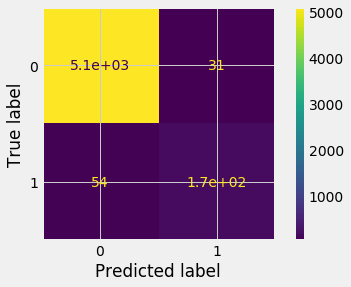

In [45]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr, x_test, y_test) 
plt.show()

#### Logistic Regression Hyperparameter Tuning Using Grid Search<a name="e411"></a>

In [46]:
from sklearn.model_selection import GridSearchCV
log_reg = LogisticRegression()
c_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
penalty_options = ['l1', 'l2']
param_grid = dict(C = c_values, penalty = penalty_options)
grid_tfidf = GridSearchCV(log_reg, param_grid = param_grid, cv = 10, scoring = 'roc_auc', n_jobs = -1, verbose=1)
grid_tfidf.fit(x_train, y_train)
log_reg_pred = grid_tfidf.predict(x_test)
print ("Best score: ",grid_tfidf.best_score_)
print ("Best parameter: ",grid_tfidf.best_params_)



Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   58.2s finished


Best score:  0.9760590100105496
Best parameter:  {'C': 0.1, 'penalty': 'l2'}


In [47]:
#print (roc_auc_score(y_test, log_reg_pred))
print (classification_report(y_test, log_reg_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5137
           1       0.91      0.73      0.81       227

    accuracy                           0.99      5364
   macro avg       0.95      0.86      0.90      5364
weighted avg       0.98      0.99      0.98      5364



There is an increase in the accurancy score after using the grid search to tune the paramaters. From 98%, the accurancy score is increased to 99% after the hyperparameter tuning using grid search. 

### Random Forest  <a name="e42"></a>

In [48]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
forest=RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=1)

#Train the model using the training sets
forest.fit(x_train,y_train)

#predicting the test set result
y_pred=forest.predict(x_test)

from sklearn import metrics
# prining the Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9856450410141685


In [49]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))

[[5133    4]
 [  73  154]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5137
           1       0.97      0.68      0.80       227

    accuracy                           0.99      5364
   macro avg       0.98      0.84      0.90      5364
weighted avg       0.99      0.99      0.98      5364



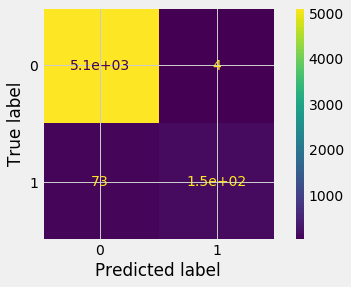

In [50]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(forest, x_test, y_test) 
plt.show()

#### Random Forest Hyperparameter Tuning Using Grid Search<a name="e422"></a>

In [51]:
#hyperparameter best n_estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
n_estimators_range = [1, 2, 4,8,16,32,64,100,200]
param_grid_rf = dict(n_estimators = n_estimators_range)
grid_rf = GridSearchCV(rf, param_grid_rf, cv = 10, scoring = 'roc_auc', n_jobs = -1, verbose = 1)
grid_rf.fit(x_train, y_train)
rf_pred = grid_rf.predict(x_test)
print ("Best score:",grid_rf.best_score_)
print ("Best parameter:",grid_rf.best_params_)


Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  4.7min finished


Best score: 0.9827422690329696
Best parameter: {'n_estimators': 200}


In [52]:
print (classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5137
           1       0.97      0.67      0.79       227

    accuracy                           0.99      5364
   macro avg       0.98      0.83      0.89      5364
weighted avg       0.99      0.99      0.98      5364



In [53]:
#using the best n_estimator
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
forest=RandomForestClassifier(n_estimators=200, random_state=1, n_jobs=1)

#Train the model using the training sets y_pred=clf.predict(X_test)
forest.fit(x_train,y_train)

#predicting the test set result
y_pred=forest.predict(x_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9856450410141685


In [54]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))

[[5133    4]
 [  73  154]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5137
           1       0.97      0.68      0.80       227

    accuracy                           0.99      5364
   macro avg       0.98      0.84      0.90      5364
weighted avg       0.99      0.99      0.98      5364



It is shows that, there is no difference in the accurancy score before and after the tuning. Probably, 99% is the best accurancy score of the model and there is nothing much can be improvised to enhance the model's performance. 

### KNN  <a name="e43"></a>

A random value for k is choosen to check the accuracy.

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
y_pred = knn.predict(x_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9103281133482476


#### KNN  tuning <a name="e433"></a>

The best value of K  will have the least error rate. But utilising the test data for tuning of hyperparameter can lead to  overfiting. So k-fold cross validation is used, it involves calculationg the error rate  for a subset  of training  set.This set is the validating set. 10 –fold cross validation is utilised.It randomly divides the training set into 10  folds of almost equal size.The first fold is the validating set and the method  will be fittied on the 9 folds. It will be repeated 10 times  and each time  adifferent fold  is treated as a validating set.

In [56]:
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
neighbors = list(range(1, 30,2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 23


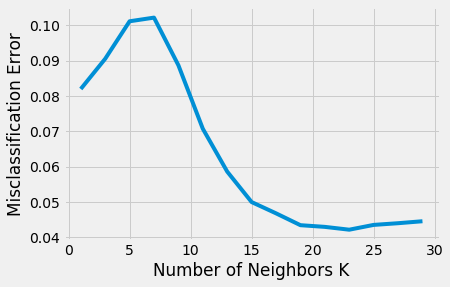

In [57]:
#changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=23)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
pred = knn.predict(x_test)

# evaluate accuracy
print("accuracy: {}".format(accuracy_score(y_test, pred)))
print (classification_report(y_test, pred))

accuracy: 0.9629008202833707
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5137
           1       0.57      0.50      0.53       227

    accuracy                           0.96      5364
   macro avg       0.77      0.74      0.76      5364
weighted avg       0.96      0.96      0.96      5364



There is an increase in the accurancy score after tuning the KNN. From 91%, the accurancy score is increased to 96% after the tuning. Hence, it is always vital to find the optimal number of neighbors to get high accurancy score. 

### Decision Tree  <a name="e44"></a>

RepeatedStratifiedKFold with 5-fold cross validation is used. Since the target labels are not equal, stratification is employed since it ensures that the proportion of two labels will be the same as the proportion in the entire dataset during each cross validation.

In [59]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
gs_DT = DecisionTreeClassifier()

# Train Decision Tree Classifer
gs_DT = gs_DT.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = gs_DT.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9828486204325131


In [60]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))

[[5091   46]
 [  46  181]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5137
           1       0.80      0.80      0.80       227

    accuracy                           0.98      5364
   macro avg       0.89      0.89      0.89      5364
weighted avg       0.98      0.98      0.98      5364



#### Decision tree tuning <a name="e444"></a>

In [61]:
#pip install altair vega_datasets

In [62]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

cv_method = StratifiedKFold(n_splits=5, random_state=999)

In [63]:
from sklearn.tree import DecisionTreeClassifier

df_classifier = DecisionTreeClassifier(random_state=999)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [5,10,15,20],
             'min_samples_split': [2,5]}

gs_DT2 = GridSearchCV(df_classifier, 
                     params_DT, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

gs_DT2.fit(x_train, y_train);
print("Best parameter",gs_DT2.best_params_)
print("Best score",gs_DT2.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  3.5min finished


Best parameter {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2}
Best score 0.9750723093948604


In [64]:
# Create Decision Tree classifer object
gs_DT = DecisionTreeClassifier(criterion="entropy", max_depth=20)

# Train Decision Tree Classifer
gs_DT = gs_DT.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = gs_DT.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9817300521998509


In [65]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))

[[5109   28]
 [  70  157]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5137
           1       0.85      0.69      0.76       227

    accuracy                           0.98      5364
   macro avg       0.92      0.84      0.88      5364
weighted avg       0.98      0.98      0.98      5364



It is shows that, there is no difference in the accurancy score before and after the tuning. Probably, 98% is the best accurancy score of the model and there is nothing much can be improvised to enhance the model's performance.

## Performance comparison  <a name="e5"></a>

In [66]:
#scoring for KNN
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv_method_ttest = StratifiedKFold(n_splits=10, random_state=111)
scores_knn = cross_val_score(knn, x_test, y_test, cv=cv_method_ttest,  
                             n_jobs=-2,scoring='roc_auc')
scores_knn.mean()

0.8605777858903165

In [67]:
##scoring for Decision Tree
cv_results_DT = cross_val_score(estimator=gs_DT2.best_estimator_,
                                X=x_test,
                                y=y_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_DT.mean()

0.8084842618547621

In [68]:
##scoring for Random Forest
cv_results_RF = cross_val_score(estimator=grid_rf.best_estimator_,
                                X=x_test,
                                y=y_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_RF.mean()

0.9641053997609349

In [69]:
##scoring for Logistic Regression
cv_results_LR = cross_val_score(estimator=grid_tfidf.best_estimator_,
                                X=x_test,
                                y=y_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_LR.mean()

0.9576085000338622

In [70]:
from scipy import stats

print(stats.ttest_rel(scores_knn, cv_results_DT))
print(stats.ttest_rel(cv_results_DT, scores_knn))
print(stats.ttest_rel(scores_knn, cv_results_RF))
print(stats.ttest_rel(scores_knn, cv_results_LR))

print(stats.ttest_rel(cv_results_RF, cv_results_DT))
print(stats.ttest_rel(cv_results_RF, cv_results_LR))

print(stats.ttest_rel(cv_results_DT, cv_results_LR))

Ttest_relResult(statistic=2.096301359296676, pvalue=0.0655102676199762)
Ttest_relResult(statistic=-2.096301359296676, pvalue=0.0655102676199762)
Ttest_relResult(statistic=-7.62857313330072, pvalue=3.2295158986104245e-05)
Ttest_relResult(statistic=-6.747931747268597, pvalue=8.384513379028698e-05)
Ttest_relResult(statistic=7.214108447046896, pvalue=5.006271674174072e-05)
Ttest_relResult(statistic=1.0829470621019526, pvalue=0.30699102697695524)
Ttest_relResult(statistic=-6.694292960484133, pvalue=8.911440226996087e-05)


A p value lesser than 0.05 means there is a significant difference.Looking at the outputs, we can say that at a 95% significance level, Random Forest is statistically the best model in terms of AUC in contrast to the test data.

The following metrics are considered to evaluate models based on the test set:
- Accuracy
- Precision
- Recall
- F1 Score 
- Confusion Matrix

In [71]:
print("\nClassification report for Logistic Regression")
print (classification_report(y_test, log_reg_pred))
print("\nClassification report for K-Nearest Neighbor") 
print (classification_report(y_test, pred))
print("\nClassification report for RandomForest") 
print (classification_report(y_test, rf_pred))
print("\nClassification report for Decision tree") 
print(classification_report(y_test,y_pred))


Classification report for Logistic Regression
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5137
           1       0.91      0.73      0.81       227

    accuracy                           0.99      5364
   macro avg       0.95      0.86      0.90      5364
weighted avg       0.98      0.99      0.98      5364


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5137
           1       0.57      0.50      0.53       227

    accuracy                           0.96      5364
   macro avg       0.77      0.74      0.76      5364
weighted avg       0.96      0.96      0.96      5364


Classification report for RandomForest
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5137
           1       0.97      0.67      0.79       227

    accuracy                           0.99      

In [72]:
from sklearn import metrics
print("\nClassification report for Logistic Regression")
print (metrics.confusion_matrix(y_test, log_reg_pred))
print("\nConfusion matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(y_test, pred))
print("\nClassification report for RandomForest") 
print (metrics.confusion_matrix(y_test, rf_pred))
print("\nConfusion matrix for Decision Tree") 
print(metrics.confusion_matrix(y_test, y_pred))


Classification report for Logistic Regression
[[5120   17]
 [  61  166]]

Confusion matrix for K-Nearest Neighbor
[[5052   85]
 [ 114  113]]

Classification report for RandomForest
[[5133    4]
 [  75  152]]

Confusion matrix for Decision Tree
[[5109   28]
 [  70  157]]


In [73]:
#LR
FP_lr=21
TP_lr=170
FN_lr=57
TN_lr=5116

#Precision gives information about how we can assure that an instance predicted to have the positive target are actually true.
Precision=(TP_lr)/(TP_lr+FP_lr)
#Recall provides assurance that all instances with a positive target is found by the model
Recall=(TP_lr)/(TP_lr+FN_lr)
Recall 
#F1-score provides the test accuracy
F1_Score=2*((Precision*Recall)/(Precision+Recall))
F1_Score

print("precision of logistic regression")
print(Precision)
print("Recall of logistic regression")
print(Recall)
print("F1-Score of logistic regression")
print(F1_Score)


precision of logistic regression
0.8900523560209425
Recall of logistic regression
0.748898678414097
F1-Score of logistic regression
0.813397129186603


In [74]:
#knn
FP_knn=96
TP_knn=122
FN_knn=105
TN_knn=5041

#Precision gives information about how we can assure that an instance predicted to have the positive target are actually true.
Precision=(TP_knn)/(TP_knn+FP_knn)
#Recall provides assurance that all instances with a positive target is found by the model
Recall=(TP_knn)/(TP_knn+FN_knn)
Recall 
#F1-score provides the test accuracy
F1_Score=2*((Precision*Recall)/(Precision+Recall))
F1_Score

print("precision of KNN")
print(Precision)
print("Recall of KNN")
print(Recall)
print("F1-Score of KNN")
print(F1_Score)

precision of KNN
0.5596330275229358
Recall of KNN
0.5374449339207048
F1-Score of KNN
0.548314606741573


In [75]:
#RF
FP_RF=5
TP_RF=152
FN_RF=75
TN_RF=5132

#Precision gives information about how we can assure that an instance predicted to have the positive target are actually true.
Precision=(TP_RF)/(TP_RF+FP_RF)
#Recall provides assurance that all instances with a positive target is found by the model
Recall=(TP_RF)/(TP_RF+FN_RF)
Recall 
#F1-score provides the test accuracy
F1_Score=2*((Precision*Recall)/(Precision+Recall))
F1_Score

print("precision of Random Forest")
print(Precision)
print("Recall of Random Forest")
print(Recall)
print("F1-Score of Random Forest")
print(F1_Score)

precision of Random Forest
0.9681528662420382
Recall of Random Forest
0.6696035242290749
F1-Score of Random Forest
0.7916666666666666


In [76]:
#DT
FP=25
TP=158
FN=69
TN=5112

#Precision gives information about how we can assure that an instance predicted to have the positive target are actually true.
Precision=(TP)/(TP+FP)
#Recall provides assurance that all instances with a positive target is found by the model
Recall=(TP)/(TP+FN)
Recall 
#F1-score provides the test accuracy
F1_Score=2*((Precision*Recall)/(Precision+Recall))
F1_Score

print("precision of Decision Tree")
print(Precision)
print("Recall of Decision Tree")
print(Recall)
print("F1-Score of Decision Tree")
print(F1_Score)

precision of Decision Tree
0.8633879781420765
Recall of Decision Tree
0.6960352422907489
F1-Score of Decision Tree
0.7707317073170732


Since in this project we are detecting the fraudness of the job posts using the word and description, recall is selected as the metric of performance which is the true positive rate that means Recall provides assurance that all instances with a positive target is found by the model. Hence, the logistic regression is the best performer as it has highest recall score.  The confusion matrices are in accordance with the classification reports. This is as opposed to our finding that Random Forest is measurably the best performer with regards to the AUC metric.

## Limitation and solution: <a name="f"></a>

The modelling strategy has some limitations: <br>

Firstly, we randomly chose the features based on the number of words they have. In future, random selection can be avoided and feature selection techniques can be used in selecting the best features. 

In KNN, there is a frequent occurring class in the traing set, it will be the majority that will dominate (larger number is more common in a dataset).This can be improvised by skewing the distribution of class which can be corrected by weighed voting.By using techniques like PCA before applying KNN and make the metric of the  distance more understandable.Moreover, hamming distance can be used for text classification.

Another limitation is in the decision tree.The tress can be very unstable due to the small variation in the data which can result in a complete different tree. In classification case, if some dominate classes are present , it creates a biased trees.Hence, increasing the depth is crucial to get optimal result. 

# Summary & Conclusions <a name="g"></a>

Random Forest model with the 5 of the best features provided the highest cross-validated AUC score on the training set. Moreover, the Random Forest model again outperformed well  with other models such as KNN and Decision Tree in terms of AUC. Nevertheless, Logistic Regression model has highest recall score on the test data. We can cleary see that, the models are not sensitive to the number of feature selected as they are working well with these features. However, limited features are selected to avoid overfitting and it is easy to train and understand the models. <br>
The features are selected based on the number of words they contained. The 5 features that selected contain more words. Thus, they are selected in building the model as our objective is to use relevent features to minimize dimensionality and use the words and description in the job advertisement in order build a classification model which will able to detect fraud job posts effectively with high accurancy. Overall, the goal of building a reliable classification model to predict the fraudulent of the job advertisments using words and description is achieved.  